# Linear Regression Model trained on house price data

In [1]:
import os
print(os.getcwd())

C:\Users\AKASH


In [1]:
import pandas as pd 
import numpy as np 


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%matplotlib inline 

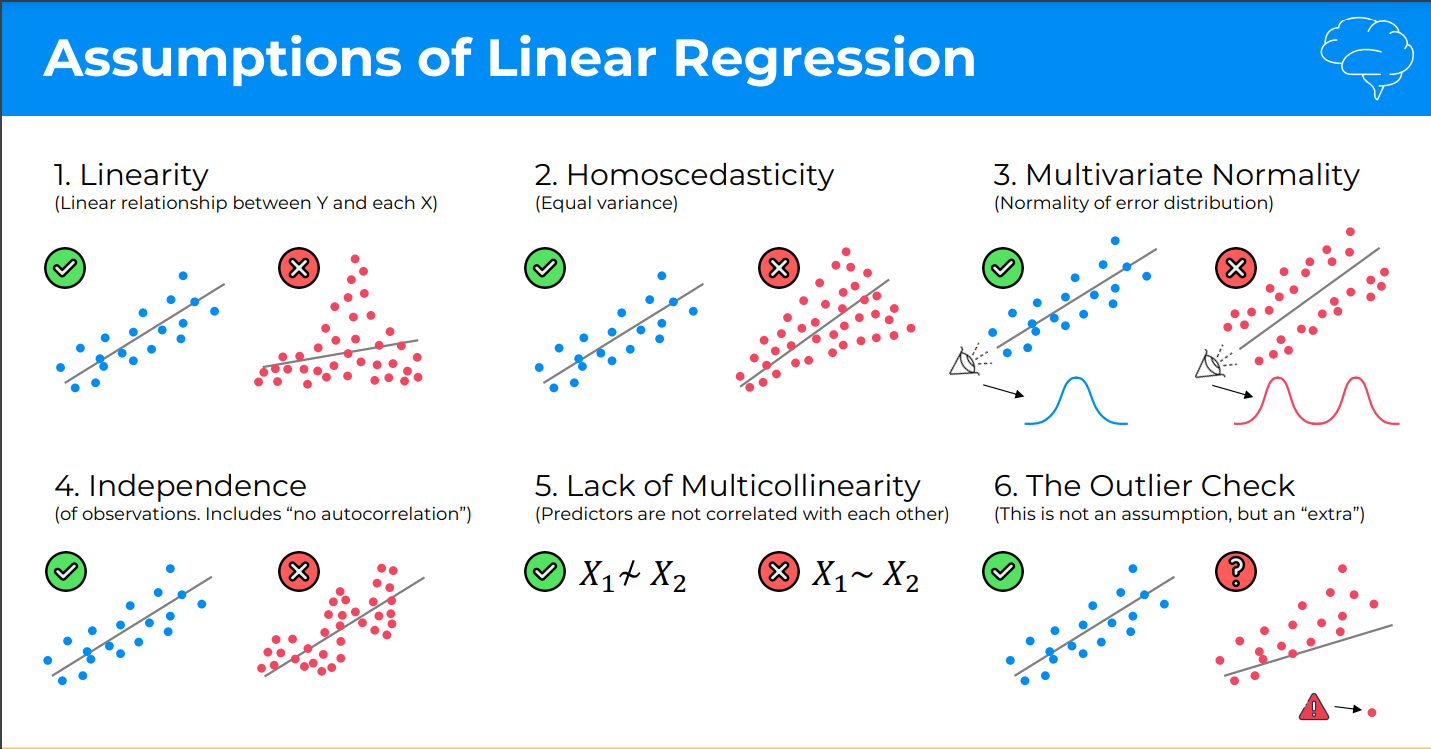

In [6]:
# Some of the assumption of the 

from IPython.display import Image
Image(filename=r"C:\Users\AKASH\Pictures\Screenshots\lm.png",width=800,height=600)

In [6]:
df = pd.read_csv("Desktop/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv")

In [7]:
df.head()
# df[df["Area Population"] == 23086.800503]
# df["Price"].mean()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.describe() # must check all of these first 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

C:\Users\AKASH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\AKASH\AppData\Local\Temp\ipykernel_8660\4161368131.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


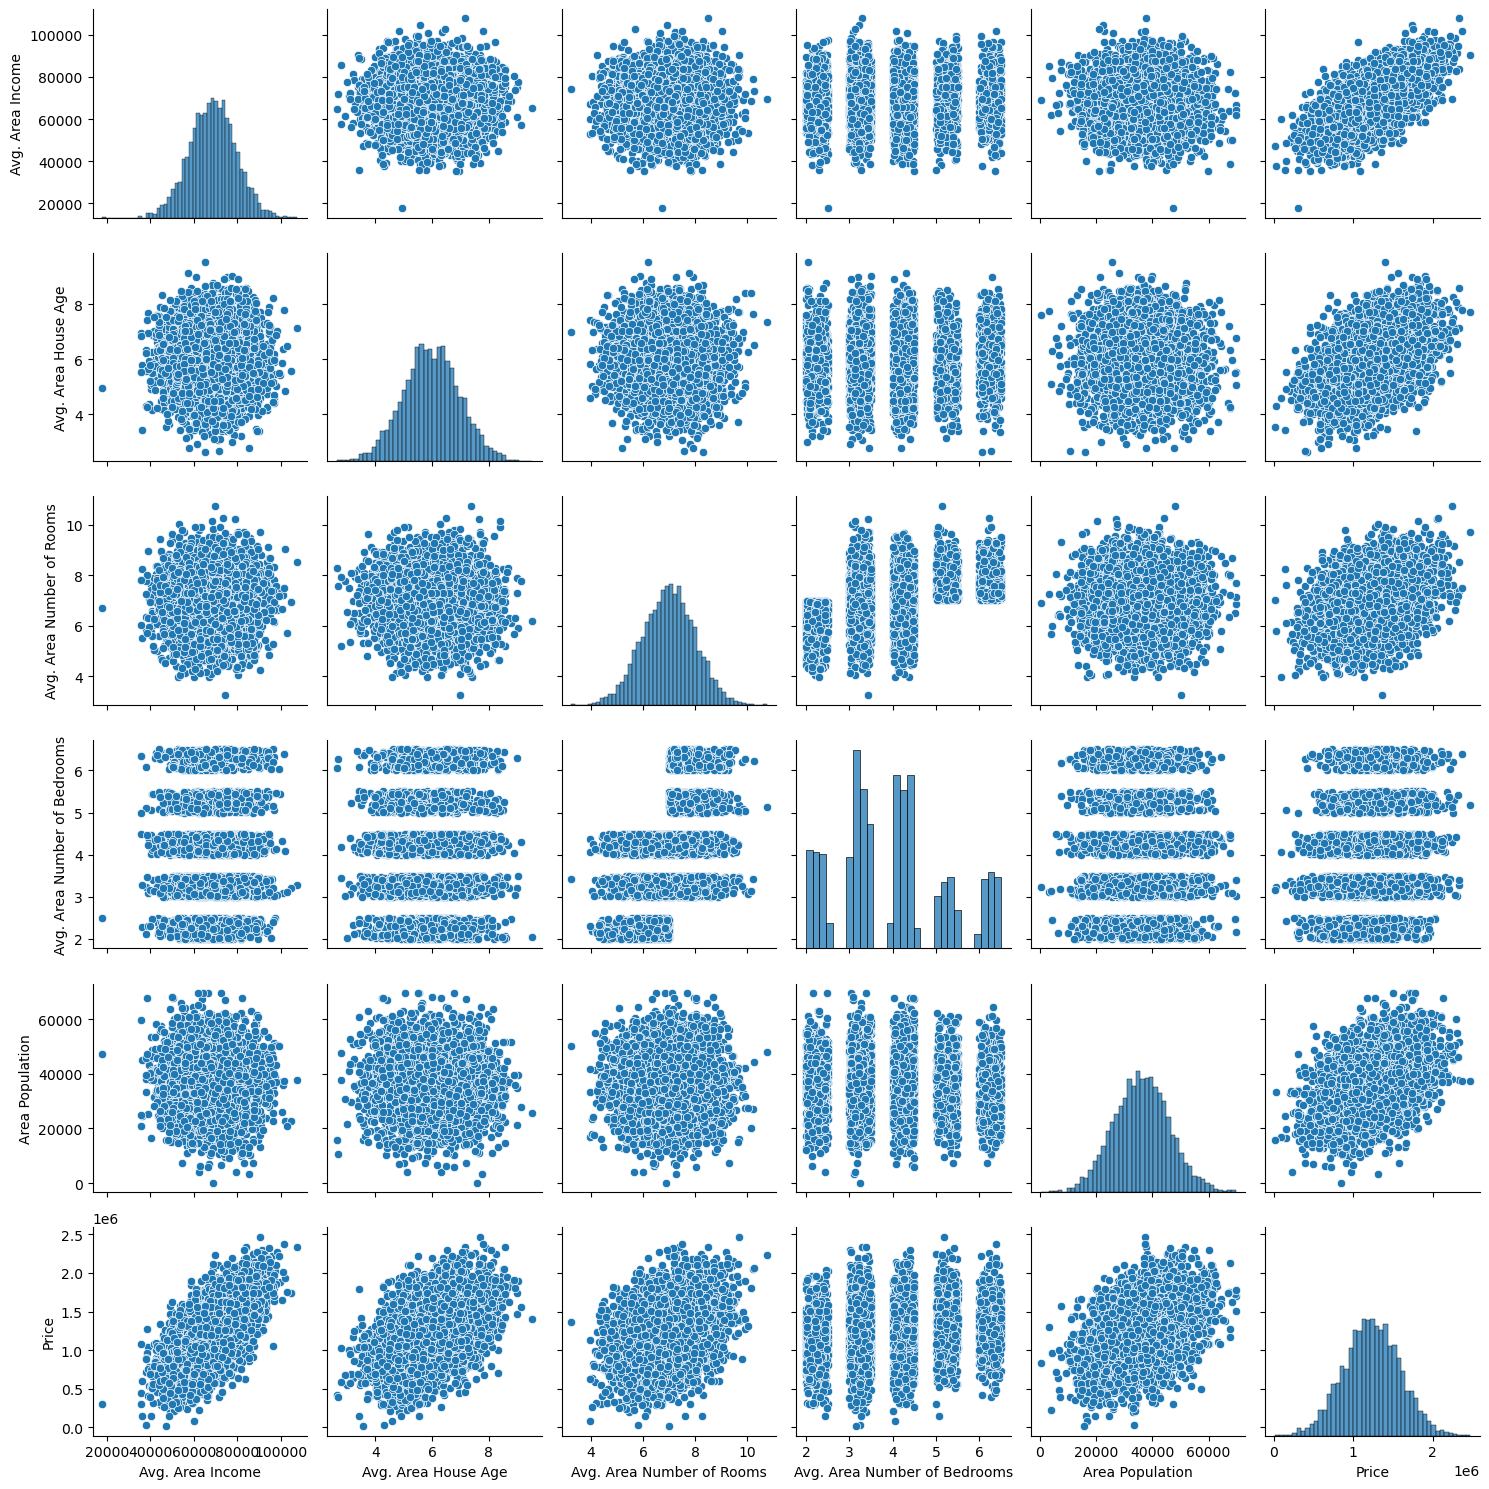

In [11]:
sns.pairplot(df)
plt.tight_layout()    


C:\Users\AKASH\AppData\Local\Temp\ipykernel_8660\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

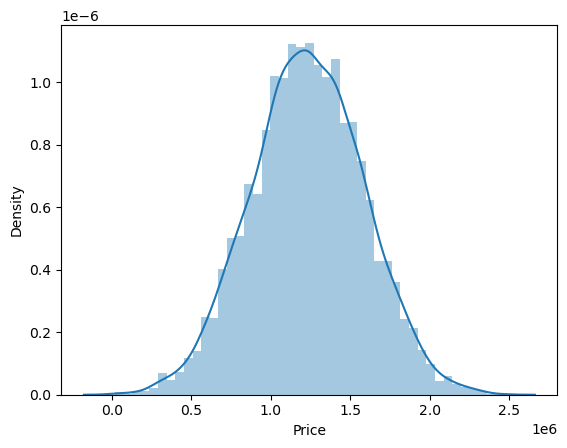

In [12]:
sns.distplot(df["Price"])

In [13]:
df1 = df.drop("Address",axis=1)
df1.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

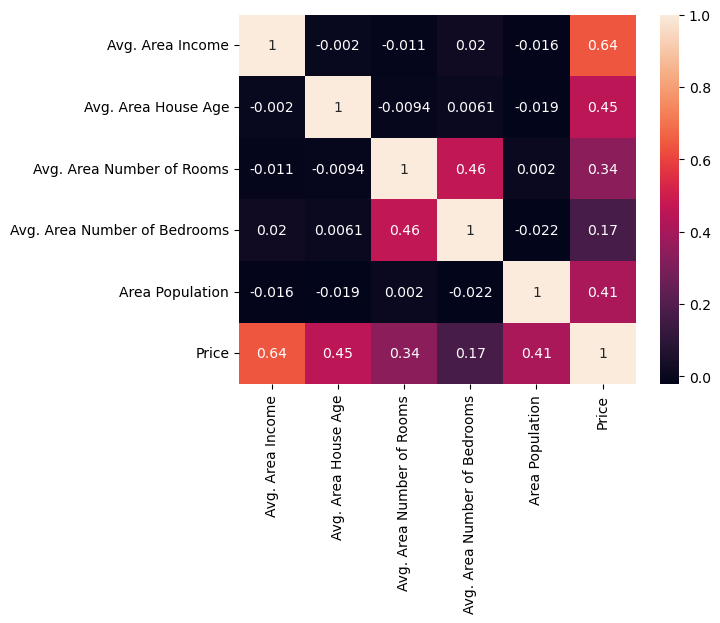

In [14]:
sns.heatmap(df1.corr(),annot = True)

In [15]:
df.columns 


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [16]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [17]:
y = df["Price"]

# Let's start Training our data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)


LinearRegression()

In [23]:
print(lm.intercept_)

-2640159.7968525277


In [24]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [25]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [26]:
cdf =  pd.DataFrame(lm.coef_ , X.columns , columns=  ["Coeff"])

In [27]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Predictios


In [28]:
predictions = lm.predict(X_test)

In [29]:
predictions  # these are the predicted prices of the house 

array([1260960.70567627,  827588.75560334, 1742421.2425434 , ...,
        372191.40626923, 1365217.15140897, 1914519.5417887 ])

In [30]:
y_test  # these are the correct prices of the house

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

Compair your prediction with the correct data

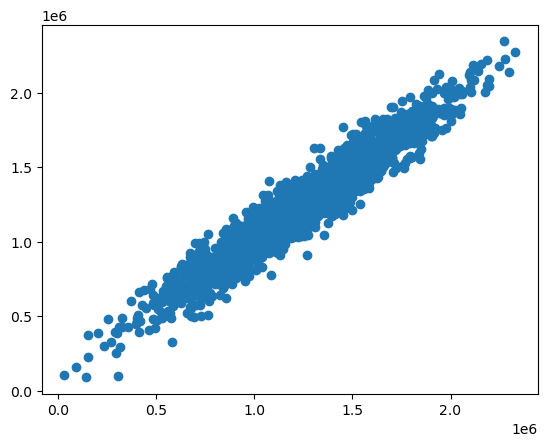

In [31]:
plt.scatter(y_test,predictions)
# if it comes " Kind of a linear line than you have
# done a good job"

C:\Users\AKASH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


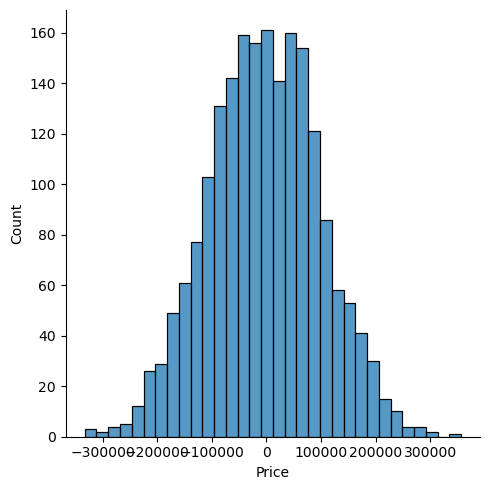

In [32]:
sns.displot((y_test-predictions))  # Residual in the data

# Regression Error Matrices

In [33]:
from sklearn import metrics

In [34]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914947

In [35]:
metrics.mean_squared_error(y_test,predictions)

10460958907.209057

In [36]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290935

In [37]:
predictions = lm.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.values.reshape(len(predictions),1)),1))


[[1260960.71 1251688.62]
 [ 827588.76  873048.32]
 [1742421.24 1696977.66]
 ...
 [ 372191.41  151527.08]
 [1365217.15 1343824.22]
 [1914519.54 1906024.64]]
